In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\5_optimal_skills.csv")

In [3]:
df

,skill_id,skills,demand_count,avg_salary
0,8,go,27,115320
1,97,hadoop,22,113193
2,80,snowflake,37,112948
3,74,azure,34,111225
4,76,aws,32,108317
5,79,oracle,37,104534
6,185,looker,49,103795
7,1,python,236,101397
8,5,r,148,100499
9,182,tableau,230,99288


In [4]:
df_top_20 = df.drop("skill_id", axis=1).copy()
df_top_20

,skills,demand_count,avg_salary
0,go,27,115320
1,hadoop,22,113193
2,snowflake,37,112948
3,azure,34,111225
4,aws,32,108317
5,oracle,37,104534
6,looker,49,103795
7,python,236,101397
8,r,148,100499
9,tableau,230,99288


In [5]:
df_top_20 = df_top_20.set_index("skills")
df_top_20

,demand_count,avg_salary
skills,,
go,27,115320
hadoop,22,113193
snowflake,37,112948
azure,34,111225
aws,32,108317
oracle,37,104534
looker,49,103795
python,236,101397
r,148,100499


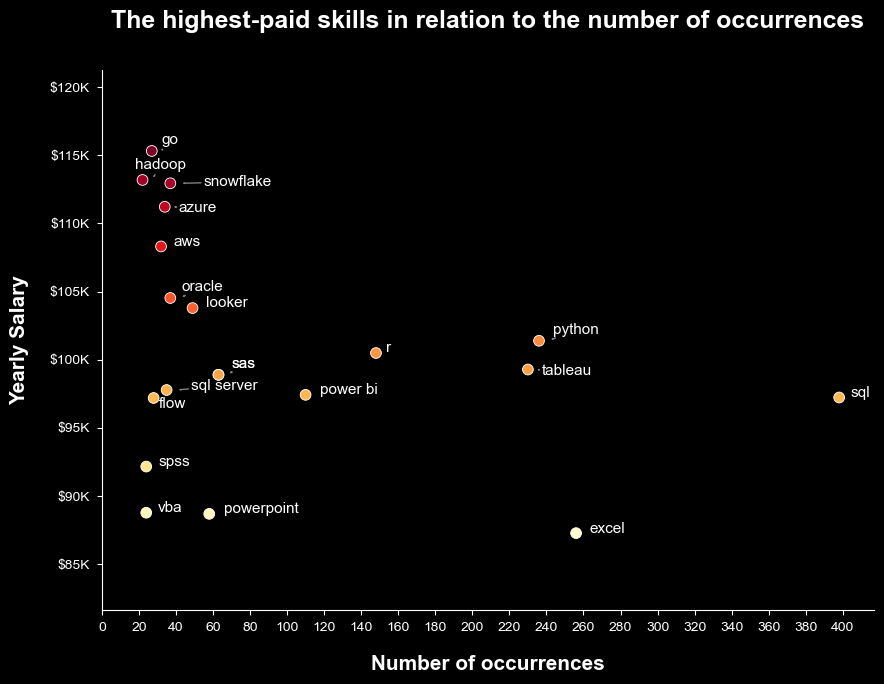

In [6]:
plt.figure(figsize=(9, 7), facecolor="black")
sns.scatterplot(
    data=df_top_20,
    x="demand_count",
    y="avg_salary",
    s=60,
    hue="avg_salary",
    palette="YlOrRd",
    legend=False
)

ax = plt.gca() 
ax.set_facecolor("black")  

sns.despine()
sns.set_theme(style="ticks")

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_top_20.index):
    x = df_top_20['demand_count'].iloc[i]
    y = df_top_20['avg_salary'].iloc[i]
    texts.append(plt.text(x + 5, y - 5, txt, fontsize=11, color='white'))

# Adjust text to avoid overlap
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray"))

# Set axis labels, title
plt.xlabel('Number of occurrences', color='white', fontsize=15, fontweight='bold', labelpad=15)
plt.ylabel('Yearly Salary', color='white', fontsize=15, fontweight='bold', labelpad=15)
plt.title("The highest-paid skills in relation to the number of occurrences", color='white', fontsize=18, fontweight='bold', pad=30)

# Set the color of the X and Y axes to white
ax.spines['bottom'].set_color('white')  # X Axis
ax.spines['left'].set_color('white')    # Y Axis

# Set the color of the text next to the axis
ax.tick_params(axis='x', colors='white', pad=5)  # X Axis
ax.tick_params(axis='y', colors='white', pad=5)  # Y Axis

# Formating x, y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

ax.set_xticks(range(0, 410, 20))
ax.set_yticks(range(85000, 125000, 5000))
ax.margins(y=0.2)

# Adjust layout and display 
plt.tight_layout()
plt.show()